In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([
    [2100, 3],
    [1600, 3],
    [2400, 3],
    [1416, 2],
    [3000, 4],
    [1985, 4],
    [1534, 3],
    [1427, 3],
])

# Labels (house price in 1000s)
y = np.array([400, 330, 369, 232, 540, 460, 315, 298])

m = len(y) 

In [2]:
def feature_normalization(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma #normalization step
    return X_norm, mu, sigma

X_norm, mu, sigma = feature_normalization(X)
print("Normalized features: ", X_norm)

Normalized features:  [[ 0.32034988 -0.20851441]
 [-0.63734781 -0.20851441]
 [ 0.89496849 -0.20851441]
 [-0.98978056 -1.87662973]
 [ 2.04420571  1.4596009 ]
 [ 0.10007941  1.4596009 ]
 [-0.7637639  -0.20851441]
 [-0.96871121 -0.20851441]]


In [3]:
X_norm = np.c_[np.ones((m, 1)), X_norm]

In [4]:
def cost_funtion_multi(X, y, w):
    m = len(y)
    predictions = X @ w
    cost = (1/(2*m)) * np.sum((predictions - y) ** 2)
    return cost

w = np.zeros(X_norm.shape[1])
cost = cost_funtion_multi(X_norm, y, w)
print(f"Initial cost: {cost}")

Initial cost: 71882.125


In [5]:
def gradient_descent_multi(X, y, w, alpha, num_iters):
    m = len(y)
    cost_history = []

    for i in range(num_iters):
        predicted_values = X @ w  
        error_vector = predicted_values - y 
        gradient = X.T @ error_vector 
        w -= (alpha/m) * gradient  

        if i % 100 == 0:
            cost_history.append(cost_funtion_multi(X, y, w))
            print(f"Iteration {i}: Cost {cost_history[-1]}")

    return w, cost_history 

# Set hyperparameters
alpha = 0.01
num_iters = 1500

# Run gradient descent
w, cost_history = gradient_descent_multi(X_norm, y, w, alpha, num_iters)

# Final optimized weights
print(f"Optimized weights: {w}")


Iteration 0: Cost 70402.37806607218
Iteration 100: Cost 9164.625513151548
Iteration 200: Cost 1328.2175535129272
Iteration 300: Cost 290.6624858649001
Iteration 400: Cost 151.71515706277404
Iteration 500: Cost 132.91324430341464
Iteration 600: Cost 130.29361363267822
Iteration 700: Cost 129.89213502120919
Iteration 800: Cost 129.8131112918357
Iteration 900: Cost 129.7899198628041
Iteration 1000: Cost 129.7805174221124
Iteration 1100: Cost 129.77611339173154
Iteration 1200: Cost 129.77395286032066
Iteration 1300: Cost 129.77287898490485
Iteration 1400: Cost 129.77234331907857
Optimized weights: [367.99989561  44.32380076  54.43060699]


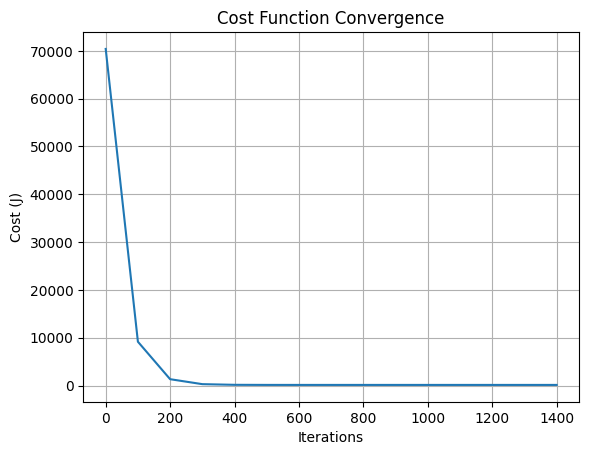

In [6]:
plt.plot(range(0, num_iters, 100), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost (J)')
plt.title('Cost Function Convergence')
plt.grid(True)
plt.show()


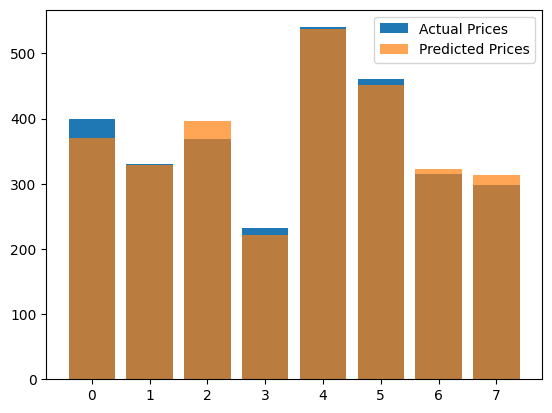

In [8]:
predictions = X_norm @ w
plt.bar(range(m), y, label="Actual Prices")
plt.bar(range(m), predictions, alpha=0.7, label="Predicted Prices")
plt.legend()
plt.show()
